In [1]:
#jk
import requests
import pandas as pd
import lxml

In [2]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests

In [365]:
equipo_1 = 'jacksonville-jaguars'

In [366]:
parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
resp = requests.get("https://www.espn.com.mx/futbol-americano/nfl/posiciones")
http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
encoding = html_encoding or http_encoding
soup = BeautifulSoup(resp.content, parser, from_encoding=encoding)
lista = []
for link in soup.find_all('a', href=True):
    lista.append(link['href'])
#Se crea una lista con todos los links anidados en la pagina de las comisiones    
#lista

In [367]:
link_equipo = []
for i in lista:
    if equipo_1 in i:
        link_equipo.append(i)
link_equipo

['/futbol-americano/nfl/equipo/_/nombre/jax/jacksonville-jaguars',
 '/futbol-americano/nfl/equipo/_/nombre/jax/jacksonville-jaguars',
 '/futbol-americano/nfl/equipo/_/nombre/jax/jacksonville-jaguars']

In [368]:
link_team = link_equipo[1]
index = link_team.find('_/')
final_link = link_team[:index] + 'calendario/' + link_team[index:]
final_link

'/futbol-americano/nfl/equipo/calendario/_/nombre/jax/jacksonville-jaguars'

In [369]:
parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
resp = requests.get('https://www.espn.com.mx' + final_link)
http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
encoding = html_encoding or http_encoding
soup = BeautifulSoup(resp.content, parser, from_encoding=encoding)
lista = []
for link in soup.find_all('a', href=True):
    lista.append(link['href'])
#Se crea una lista con todos los links anidados en la pagina de las comisiones    
#lista

In [370]:
#####CAMBIAR EL NUMERO DE CORTE#############
lista_equipos = []
for i in lista:
    if 'equipo' in i:
        lista_equipos.append(i)
        
lista_equipos =lista_equipos[7:]###########
lista_equipos.append('r')
#lista_equipos

In [371]:
def mid(lista):
    lista_2 =[]
    lista_final = []
    j = lista[0]
    
    for i in lista:
        if i == j:
            lista_2.append(i)
            j = i
            
        else:
            half = len (lista_2)//2
            mitad = lista_2[:half]
            
            for k in mitad: 
                lista_final.append(k)
            lista_2.clear()
            lista_2.append(i)
            j = i
            
    return lista_final

In [372]:
peque =[1,1,2,2,2,2,2,2,3,3,3,3,'r']
oponente = mid(lista_equipos)
oponente.insert(0, lista_equipos[0]) ######a lo mejor quitar
oponente

['/futbol-americano/nfl/equipo/_/nombre/lac/los-angeles-chargers',
 '/futbol-americano/nfl/equipo/_/nombre/wsh/washington-commanders',
 '/futbol-americano/nfl/equipo/_/nombre/ind/indianapolis-colts',
 '/futbol-americano/nfl/equipo/_/nombre/lac/los-angeles-chargers',
 '/futbol-americano/nfl/equipo/_/nombre/phi/philadelphia-eagles',
 '/futbol-americano/nfl/equipo/_/nombre/hou/houston-texans',
 '/futbol-americano/nfl/equipo/_/nombre/ind/indianapolis-colts',
 '/futbol-americano/nfl/equipo/_/nombre/nyg/new-york-giants',
 '/futbol-americano/nfl/equipo/_/nombre/den/denver-broncos',
 '/futbol-americano/nfl/equipo/_/nombre/lv/las-vegas-raiders',
 '/futbol-americano/nfl/equipo/_/nombre/kc/kansas-city-chiefs',
 '/futbol-americano/nfl/equipo/_/nombre/bal/baltimore-ravens',
 '/futbol-americano/nfl/equipo/_/nombre/det/detroit-lions',
 '/futbol-americano/nfl/equipo/_/nombre/ten/tennessee-titans',
 '/futbol-americano/nfl/equipo/_/nombre/dal/dallas-cowboys',
 '/futbol-americano/nfl/equipo/_/nombre/nyj/

In [373]:
url = 'https://www.espn.com.mx' + final_link
dfs = pd.read_html(url)[0]

dfs

,0,1,2,3,4,5,6,7,8,9
0,Postseason,Postseason,Postseason,Postseason,Postseason,Postseason,Postseason,Postseason,NaN,NaN
1,SEM,FECHA,OPONENTE,HORA,NaN,NaN,NaN,NaN,NaN,NaN
2,WC,"Sáb., 14 de Ene.",vs. Los Angeles,8:15 PM,NaN,NaN,NaN,NaN,NaN,NaN
3,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular,NaN,NaN
4,SEM,FECHA,OPONENTE,Resultado,G-P,L. Pases,L. Corr.,L. Recib.,NaN,NaN
5,1,"Dom., 11 de Sep.",en Washington,P28-22,0-1,Lawrence 275,Robinson 66,Kirk 117,NaN,NaN
6,2,"Dom., 18 de Sep.",vs. Indianapolis,G24-0,1-1,Lawrence 235,Robinson 64,Kirk 78,NaN,NaN
7,3,"Dom., 25 de Sep.",en Los Angeles,G38-10,2-1,Lawrence 262,Robinson 100,Jones 85,NaN,NaN
8,4,"Dom., 2 de Oct.",en Philadelphia,P29-21,2-2,Lawrence 174,Etienne Jr. 32,Kirk 60,NaN,NaN
9,5,"Dom., 9 de Oct.",vs. Houston,P13-6,2-3,Lawrence 286,Etienne Jr. 71,Jones Jr. 104,NaN,NaN


In [374]:
df_resultados= dfs.drop([4,5,6,7],axis =1)
#df_resultados = df_resultados.dropna()
pd.set_option('max_columns', 160)
pd.set_option('max_rows', 160)

df_resultados


,0,1,2,3,8,9
0,Postseason,Postseason,Postseason,Postseason,NaN,NaN
1,SEM,FECHA,OPONENTE,HORA,NaN,NaN
2,WC,"Sáb., 14 de Ene.",vs. Los Angeles,8:15 PM,NaN,NaN
3,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular,NaN,NaN
4,SEM,FECHA,OPONENTE,Resultado,NaN,NaN
5,1,"Dom., 11 de Sep.",en Washington,P28-22,NaN,NaN
6,2,"Dom., 18 de Sep.",vs. Indianapolis,G24-0,NaN,NaN
7,3,"Dom., 25 de Sep.",en Los Angeles,G38-10,NaN,NaN
8,4,"Dom., 2 de Oct.",en Philadelphia,P29-21,NaN,NaN
9,5,"Dom., 9 de Oct.",vs. Houston,P13-6,NaN,NaN


In [375]:
carreras = list(df_resultados[3])
runs = []
for i in carreras:
    if i =='Cancelado':
        runs.append('sin jugar')
    
    elif i == 'Pretemporada':
        runs.append('no me importa')
        runs.pop()
        
    elif i == 'Postseason':
        runs.append('no me importa')
        runs.pop()
        
        
    elif ':' in i:
        runs.append('sin jugar')
        
        
    elif 'P' in i:
        x = i.split()
        y = x[0]
        z = y.split('P')
        a = z[1]
        b = a.split('-')
        j = int(b[0])
        k = int(b[1])
        c = k - j
        runs.append(c)
        
    elif 'G' in i:
        x = i.split()
        y = x[0]
        z = y.split('G')
        a = z[1]
        b = a.split('-')
        j = int(b[0])
        k = int(b[1])
        c = j - k
        runs.append(c)
        
    elif i[0] == 'E':
        runs.append(0)
    
        
runs

['sin jugar',
 -6,
 24,
 28,
 -8,
 -7,
 -7,
 -6,
 -4,
 7,
 -10,
 1,
 -26,
 14,
 6,
 16,
 28,
 4,
 -16,
 -11,
 -1,
 -16]

In [376]:
url = 'https://www.espn.com.mx/futbol-americano/nfl/posiciones/_/grupo/liga'
dfs_1 = pd.read_html(url)[0]
dfs= pd.read_html(url)[1]


In [377]:
dfs

,G,P,E,PCT,LOCAL,VIS,DIV,CONF,PA,PC,DIFP,R
0,14,3,0,0.824,7-1,7-2,6-0,9-3,496,369,127,G5
1,14,3,0,0.824,7-2,7-1,4-2,9-3,477,344,133,G1
2,13,3,0,0.813,7-1,6-2,4-2,9-2,455,286,169,G7
3,13,4,0,0.765,8-1,5-3,6-0,10-2,450,277,173,G10
4,13,4,0,0.765,8-1,5-3,4-2,8-4,424,427,-3,G1
5,12,4,0,0.750,6-1,6-3,3-3,8-3,418,322,96,G8
6,12,5,0,0.706,8-1,4-4,4-2,8-4,467,342,125,P1
7,10,7,0,0.588,5-3,5-4,2-4,7-5,391,384,7,P1
8,10,7,0,0.588,5-3,5-4,3-3,6-6,350,315,35,P2
9,9,7,1,0.559,5-3-1,4-4,1-4-1,4-7-1,365,371,-6,P1


In [378]:
pct = list(dfs['PCT'])
team = list(dfs_1)
team = team[0]
team_1 = list(dfs_1[team])
team_1.insert(0,team)
team_1

['* --KCKansas City Chiefs',
 '* --PHIPhiladelphia Eagles',
 'z --BUFBuffalo Bills',
 'z --SFSan Francisco 49ers',
 'z --MINMinnesota Vikings',
 'z --CINCincinnati Bengals',
 'y --DALDallas Cowboys',
 'y --LACLos Angeles Chargers',
 'y --BALBaltimore Ravens',
 'y --NYGNew York Giants',
 'z --JAXJacksonville Jaguars',
 'y --MIAMiami Dolphins',
 'y --SEASeattle Seahawks',
 'e --DETDetroit Lions',
 'e --PITPittsburgh Steelers',
 'e --WSHWashington Commanders',
 'z --TBTampa Bay Buccaneers',
 'e --NENew England Patriots',
 'e --GBGreen Bay Packers',
 'e --NYJNew York Jets',
 'e --TENTennessee Titans',
 'e --CARCarolina Panthers',
 'e --CLECleveland Browns',
 'e --NONew Orleans Saints',
 'e --ATLAtlanta Falcons',
 'e --LVLas Vegas Raiders',
 'e --DENDenver Broncos',
 'e --LARLos Angeles Rams',
 'e --INDIndianapolis Colts',
 'e --ARIArizona Cardinals',
 'e --HOUHouston Texans',
 'e --CHIChicago Bears']

In [379]:
team_2 = []
for i in team_1:
    j =i.lower()
    j = j.replace(' ', '-')
    team_2.append(j)


In [380]:
equipo_contrario = []
for i in oponente:
    j = i[-15:]
    equipo_contrario.append(j)
    
equipo_contrario
    


['ngeles-chargers',
 'gton-commanders',
 'ianapolis-colts',
 'ngeles-chargers',
 'adelphia-eagles',
 '/houston-texans',
 'ianapolis-colts',
 'new-york-giants',
 '/denver-broncos',
 's-vegas-raiders',
 'sas-city-chiefs',
 'altimore-ravens',
 't/detroit-lions',
 'ennessee-titans',
 '/dallas-cowboys',
 'j/new-york-jets',
 '/houston-texans',
 'ennessee-titans',
 's-vegas-raiders',
 'leveland-browns',
 'sburgh-steelers',
 'atlanta-falcons']

In [381]:
porcentaje = pd.DataFrame()
porcentaje['MLB team'] = team_2
porcentaje['PCT'] = pct

porcentaje

,MLB team,PCT
0,*---kckansas-city-chiefs,0.824
1,*---phiphiladelphia-eagles,0.824
2,z---bufbuffalo-bills,0.813
3,z---sfsan-francisco-49ers,0.765
4,z---minminnesota-vikings,0.765
5,z---cincincinnati-bengals,0.750
6,y---daldallas-cowboys,0.706
7,y---laclos-angeles-chargers,0.588
8,y---balbaltimore-ravens,0.588
9,y---nygnew-york-giants,0.559


In [382]:
diferencia = pd.DataFrame()
diferencia['Equipo'] = equipo_contrario
diferencia['Diferencia'] = runs

diferencia

,Equipo,Diferencia
0,ngeles-chargers,sin jugar
1,gton-commanders,-6
2,ianapolis-colts,24
3,ngeles-chargers,28
4,adelphia-eagles,-8
5,/houston-texans,-7
6,ianapolis-colts,-7
7,new-york-giants,-6
8,/denver-broncos,-4
9,s-vegas-raiders,7


In [383]:
ranking  = []
x = -10
y = 0

for i in diferencia['Equipo']:
    for j in porcentaje['MLB team']:
        if i[x:] == j[x:]:
            z = porcentaje[porcentaje['MLB team'] == j].index.item()
            a = porcentaje.loc[z, 'PCT']
            ranking.append(a)
            y += 1
print(y)            
#ranking


22


In [384]:
diferencia['PCT'] = ranking
diferencia

,Equipo,Diferencia,PCT
0,ngeles-chargers,sin jugar,0.588
1,gton-commanders,-6,0.500
2,ianapolis-colts,24,0.265
3,ngeles-chargers,28,0.588
4,adelphia-eagles,-8,0.824
5,/houston-texans,-7,0.206
6,ianapolis-colts,-7,0.265
7,new-york-giants,-6,0.559
8,/denver-broncos,-4,0.294
9,s-vegas-raiders,7,0.353


In [385]:
import numpy as np

indice = list(np.where(diferencia['Diferencia']=='sin jugar'))
z = indice[0]
y = z[0]

mi_porcentaje= diferencia.loc[y, 'PCT']
mi_porcentaje

0.588

In [386]:
pospuestos = diferencia['Diferencia'] != 'sin jugar'

df_diferencia = (diferencia[pospuestos])

df_diferencia
    

,Equipo,Diferencia,PCT
1,gton-commanders,-6,0.500
2,ianapolis-colts,24,0.265
3,ngeles-chargers,28,0.588
4,adelphia-eagles,-8,0.824
5,/houston-texans,-7,0.206
6,ianapolis-colts,-7,0.265
7,new-york-giants,-6,0.559
8,/denver-broncos,-4,0.294
9,s-vegas-raiders,7,0.353
10,sas-city-chiefs,-10,0.824


In [387]:
df_diferencia.drop(df_diferencia.tail(3).index, inplace = True)
df_diferencia

/home/betin/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Equipo,Diferencia,PCT
1,gton-commanders,-6,0.500
2,ianapolis-colts,24,0.265
3,ngeles-chargers,28,0.588
4,adelphia-eagles,-8,0.824
5,/houston-texans,-7,0.206
6,ianapolis-colts,-7,0.265
7,new-york-giants,-6,0.559
8,/denver-broncos,-4,0.294
9,s-vegas-raiders,7,0.353
10,sas-city-chiefs,-10,0.824


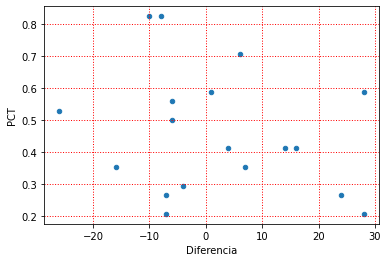

In [388]:
import matplotlib.pyplot as plt

my_plot = df_diferencia.plot('Diferencia', 'PCT', kind = 'scatter')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

In [389]:
import tensorflow as tf

In [390]:
resta = list(df_diferencia['Diferencia'])
por_ciento = list(df_diferencia['PCT'])


In [391]:
oculta1 = tf.keras.layers.Dense(units = 32, input_shape = [1], activation = 'relu')
oculta2 = tf.keras.layers.Dense(units = 16, activation = 'relu')
oculta3 = tf.keras.layers.Dense(units = 8, activation = 'relu')
oculta4 = tf.keras.layers.Dense(units = 4, activation = 'relu')
oculta5 = tf.keras.layers.Dense(units = 2, activation = 'relu')
salida = tf.keras.layers.Dense(units = 1)
modelo = tf.keras.Sequential([oculta1, oculta2,oculta3, oculta4, oculta5, salida])

In [392]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [393]:
print('entrenando')
historial= modelo.fit(por_ciento, resta, epochs = 1000, verbose = False)
print('entrenado')

entrenando
entrenado


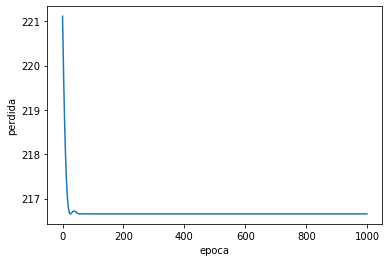

In [394]:
plt.xlabel('epoca')
plt.ylabel('perdida')
plt.plot (historial.history["loss"])

In [400]:
resultado = modelo.predict([mi_porcentaje])
resultado

array([[2.1111114]], dtype=float32)